In [1]:
import numpy as np
import h5py
from pathlib import Path
from extra_geom import AGIPD_1MGeometry
from cxiapi import cxiData
import matplotlib.pyplot as plt
from p_tqdm import p_umap, p_map
from functools import partial
import multiprocessing as mp

In [2]:
# Experiment run number.
run = 364
# Hitfinding on which module.
module = 15
# Number of CPU processes to use, '0' means using all.
nproc = 0
# The folder of cxi files
cxi_folder = '/gpfs/exfel/u/scratch/SPB/202130/p900201/spi-comission/vds/'
# Cheetah files folder for calibration
calib_folder = '/gpfs/exfel/exp/SPB/202130/p900201/usr/Software/calib/r0361-r0362-r0363/'
# Geometry file for the detector
geom_file = '/gpfs/exfel/exp/SPB/202130/p900201/usr/Software/geom/agipd_2696_v5.geom'

In [3]:
cxi_path = Path(cxi_folder, f'r{run:04}.cxi')
fn = str(cxi_path)

cxi = cxiData(fn, verbose=1, debug=0)
pulse = np.arange(0, 352)
base_pulse_filter = np.ones(600, dtype="bool")
base_pulse_filter[len(pulse):] = False
base_pulse_filter[0] = False
base_pulse_filter[18::32] = False
base_pulse_filter[29::32] = False
good_cells = pulse[base_pulse_filter[:len(pulse)]]
cxi.setGoodCells(good_cells)
cxi.setCalib(calib_folder)
cxi.setGeom(geom_file)

VDS file contains 573056 shots
Module 0 contains 352 cells
16 calibration files found


## Fast plot

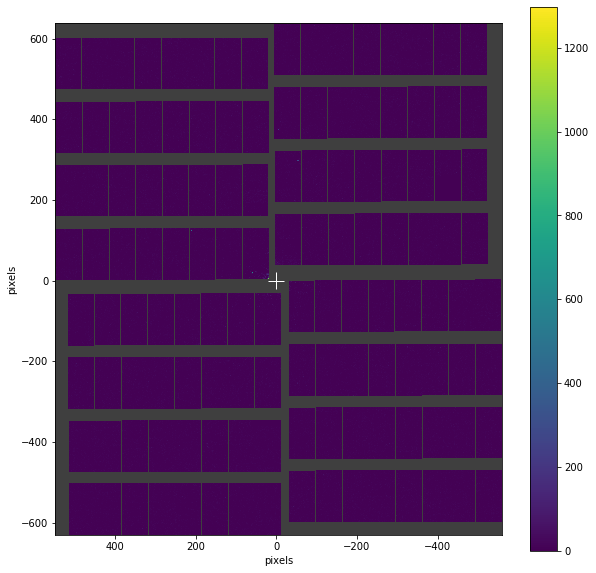

In [4]:
cxi.fastPlotCalibDetector(300)

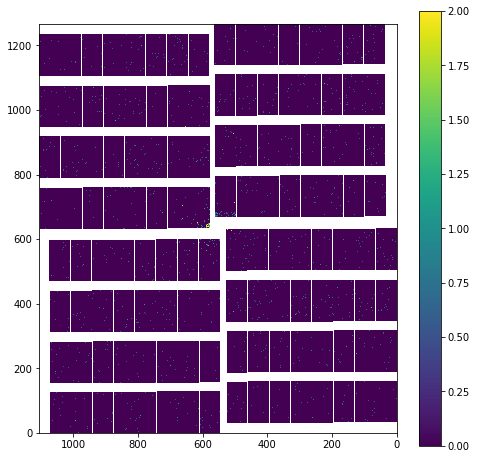

In [11]:
cxi.setADU_per_photon(45)
cxi.plot(300, ADU=False)

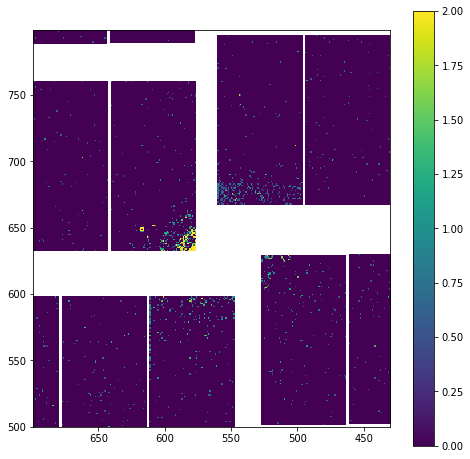

In [12]:
ROI = ((500,800), (430,700))
cxi.plot(300, ROI_value=ROI, ADU=False)

## Modules

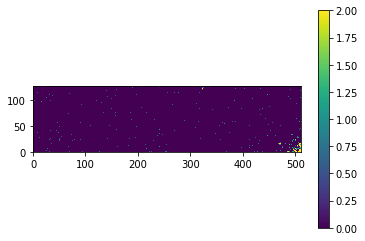

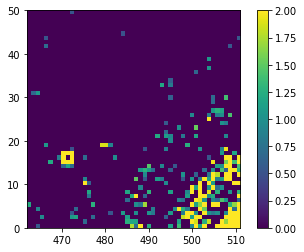

In [17]:
# plt.colorbar()
ROI = ((512-50,None), (None,51))
cxi.cleanModuleMasks()
cxi.plot(300,15, ADU=False, transpose=True)
cxi.plot(300,15, ROI_value = ROI, ADU=False, transpose=True)

### Plot in ADU 

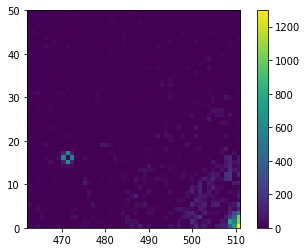

In [18]:
cxi.plot(300,15, ROI_value = ROI, ADU=True, transpose=True)

## Mask to clean up

In [19]:
mask = np.ones((512,128))
mask[470:473,15:18] = 0
cxi.setModuleMasks(15,mask)

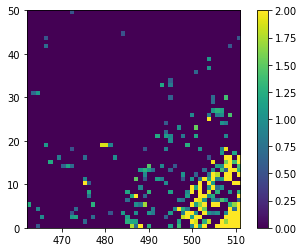

In [22]:
ROI = ((512-50,None), (None,51))
cxi.plot(300,15, ROI_value = ROI, ADU=False, transpose=True)
cxi.cleanModuleMasks()

### Adjust plot kwargs 

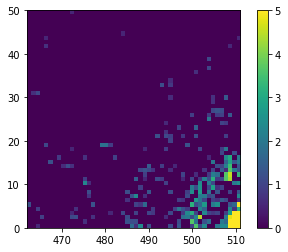

In [23]:
cxi.plot(300,15, ROI_value = ROI, ADU=False, transpose=True, module_mask=mask, vmax=5)

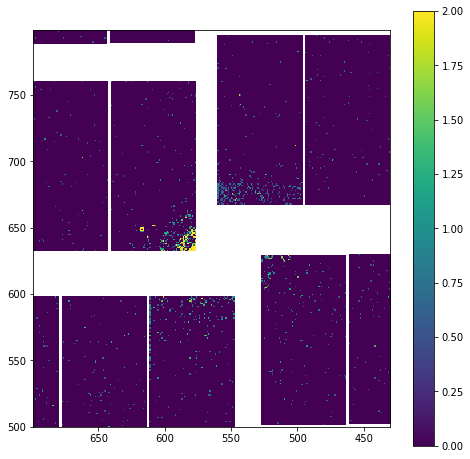

In [29]:
ROI = ((500,800), (430,700))
cxi.plot(300, ROI_value=ROI, ADU=False)

## Fixed gain 

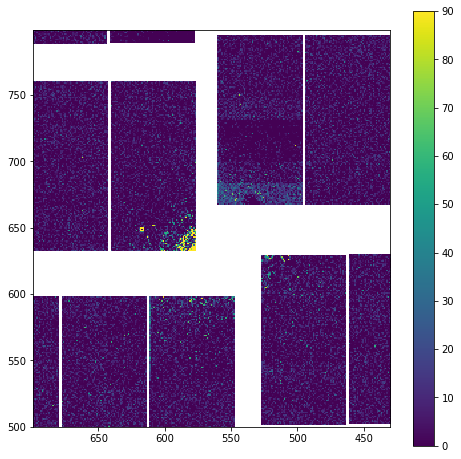

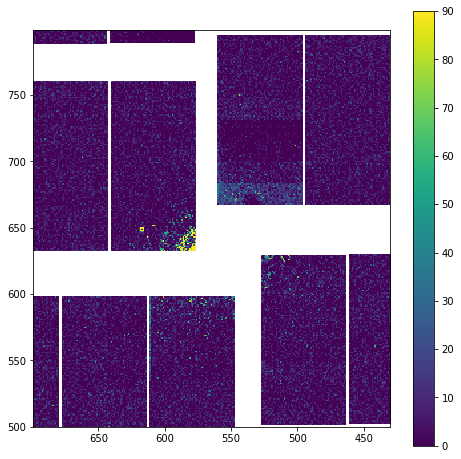

In [30]:
cxi.plot(300, ROI_value=ROI, ADU=True, vmax=90)
cxi.setGainMode(0)
cxi.plot(300, ROI_value=ROI, ADU=True, vmax=90)
cxi.setGainMode(None)